## PROHACK McKinsey and Company CHALLENGE

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.columns

Index(['galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15–64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expect

In [3]:
#train['Gross galactic product (GGP), total'].describe()
train.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


In [4]:
#train['Gross galactic product (GGP), total'].dtypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(train.dtypes)

galactic year                                                                                int64
galaxy                                                                                      object
existence expectancy index                                                                 float64
existence expectancy at birth                                                              float64
Gross income per capita                                                                    float64
Income Index                                                                               float64
Expected years of education (galactic years)                                               float64
Mean years of education (galactic years)                                                   float64
Intergalactic Development Index (IDI)                                                      float64
Education Index                                                                            float64
Intergalac

## Percentage of  NA, NAN values

In [5]:
## percenatge of na in every columns
print('Percentage  of NA columnwise')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(train.isna().sum(axis=0) * 100/ len(train))
    
print('Maximum Percentage of NA: {}'.format(max(train.isna().sum(axis=0) * 100/ len(train))))
print('Minimum Percentage of NA: {}'. format(min(train.isna().sum(axis=0) * 100/ len(train))))
print('----------------------------------------------------------------------------------------')

## percentage of na in every rows
print('Percenatge of NA rowwise')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    #print(train.isna().sum(axis=1) * 100/ len(train))
print('Maximum Percentage of NA: {}'.format(train.isna().sum(axis=1) * 100 / len(train)))
print('Maximum Percentage of NA: {}'.format(max(train.isna().sum(axis=1) * 100 / len(train))))
print('Minimu Percentage of NA: {}'.format(min(train.isna().sum(axis=1) * 100 / len(train))))

Percentage  of NA columnwise
galactic year                                                                               0.000000
galaxy                                                                                      0.000000
existence expectancy index                                                                  0.025873
existence expectancy at birth                                                               0.025873
Gross income per capita                                                                     0.724450
Income Index                                                                                0.724450
Expected years of education (galactic years)                                                3.441138
Mean years of education (galactic years)                                                    9.391979
Intergalactic Development Index (IDI)                                                      10.116429
Education Index                                               

## NA IMPUTATION

In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

train_imputed = imputer.fit_transform(train.drop(['galactic year','galaxy'], axis=1))
train_imputed = pd.DataFrame(train_imputed, columns=train.columns[2:])
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(train_imputed.isna().sum(axis=0) * 100/ len(train_imputed))

#print(train_imputed.head)
print('Maximum Percentage of NA: {}'.format(max(train_imputed.isna().sum(axis=0) * 100/ len(train_imputed))))
print('Minimum Percentage of NA: {}'. format(min(train_imputed.isna().sum(axis=0) * 100/ len(train_imputed))))

# adding the 2 first cells
train_imputed = pd.concat([train[['galactic year','galaxy']], train_imputed], axis=1)

train_imputed.to_csv('train_imputed.csv', index=False)

existence expectancy index                                                                 0.0
existence expectancy at birth                                                              0.0
Gross income per capita                                                                    0.0
Income Index                                                                               0.0
Expected years of education (galactic years)                                               0.0
Mean years of education (galactic years)                                                   0.0
Intergalactic Development Index (IDI)                                                      0.0
Education Index                                                                            0.0
Intergalactic Development Index (IDI), Rank                                                0.0
Population using at least basic drinking-water services (%)                                0.0
Population using at least basic sanitation service

In [32]:
train_imputed.isnull().sum()

galactic year                                                                0
galaxy                                                                       0
existence expectancy index                                                   0
existence expectancy at birth                                                0
Gross income per capita                                                      0
                                                                            ..
Adjusted net savings                                                         0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0
Private galaxy capital flows (% of GGP)                                      0
Gender Inequality Index (GII)                                                0
y                                                                            0
Length: 80, dtype: int64

## VISUALIZATIONS
### OUTLIERS

In [7]:
Q1 = train_imputed.quantile(0.25)
Q3 = train_imputed.quantile(0.75)
IQR = Q3 - Q1

## COUNTING PERCENTAGE OF OUTLIERS
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print((((train_imputed < (Q1 - 1.5 * IQR)) | (train_imputed > (Q3 + 1.5 * IQR))).sum() / len(train_imputed)) * 100)

Adjusted net savings                                                                       23.596378
Adolescent birth rate (births per 1,000 female creatures ages 15-19)                       32.393273
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total                  24.320828
Current health expenditure (% of GGP)                                                      22.406210
Domestic credit provided by financial sector (% of GGP)                                    27.891332
Education Index                                                                             0.129366
Employment in agriculture (% of total employment)                                          31.979301
Employment in services (% of total employment)                                             31.979301
Employment to population ratio (% ages 15 and older)                                       31.979301
Estimated gross galactic income per capita, female                                         

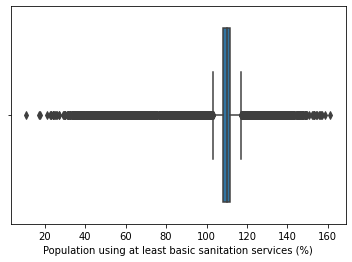

In [8]:
sns.boxplot(x = train_imputed['Population using at least basic sanitation services (%)'])

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(train_imputed.dtypes)

galactic year                                                                                int64
galaxy                                                                                      object
existence expectancy index                                                                 float64
existence expectancy at birth                                                              float64
Gross income per capita                                                                    float64
Income Index                                                                               float64
Expected years of education (galactic years)                                               float64
Mean years of education (galactic years)                                                   float64
Intergalactic Development Index (IDI)                                                      float64
Education Index                                                                            float64
Intergalac

## REMOVING OUTLIERS

In [10]:
#train_imputed = train_imputed.drop(['galactic year','galaxy'], axis=1)
train_outlier_removed = train_imputed[~((train_imputed < (Q1 - 1.5 * IQR)) |(train_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]
print(train_imputed.shape)
#print(train_outlier_removed.shape)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print((((train_outlier_removed < (Q1 - 1.5 * IQR)) | (train_outlier_removed > (Q3 + 1.5 * IQR))).sum() / len(train_outlier_removed)) * 100)

(3865, 80)
Adjusted net savings                                                                       0.0
Adolescent birth rate (births per 1,000 female creatures ages 15-19)                       0.0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total                  0.0
Current health expenditure (% of GGP)                                                      0.0
Domestic credit provided by financial sector (% of GGP)                                    0.0
Education Index                                                                            0.0
Employment in agriculture (% of total employment)                                          0.0
Employment in services (% of total employment)                                             0.0
Employment to population ratio (% ages 15 and older)                                       0.0
Estimated gross galactic income per capita, female                                         0.0
Estimated gross galactic income per cap

## CORRELATION ANALYSIS

In [11]:
corr = train_imputed.corr()
corr.style.background_gradient(cmap='coolwarm')

## imputing NAN on test data

In [36]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

test_imputed = imputer.fit_transform(test.drop(['galactic year','galaxy'], axis=1))
test_imputed = pd.DataFrame(test_imputed, columns=test.columns[2:])
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(test_imputed.isna().sum(axis=0) * 100/ len(test_imputed))

#print(train_imputed.head)
print('Maximum Percentage of NA: {}'.format(max(test_imputed.isna().sum(axis=0) * 100/ len(test_imputed))))
print('Minimum Percentage of NA: {}'. format(min(test_imputed.isna().sum(axis=0) * 100/ len(test_imputed))))

# adding the 2 first cells
test_imputed = pd.concat([test[['galactic year','galaxy']], test_imputed], axis=1)

test_imputed.to_csv('test_imputed.csv', index=False)

existence expectancy index                                                                 0.0
existence expectancy at birth                                                              0.0
Gross income per capita                                                                    0.0
Income Index                                                                               0.0
Expected years of education (galactic years)                                               0.0
Mean years of education (galactic years)                                                   0.0
Intergalactic Development Index (IDI)                                                      0.0
Education Index                                                                            0.0
Intergalactic Development Index (IDI), Rank                                                0.0
Population using at least basic drinking-water services (%)                                0.0
Population using at least basic sanitation service

In [37]:
test_imputed.isnull().sum()

galactic year                                                                0
galaxy                                                                       0
existence expectancy index                                                   0
existence expectancy at birth                                                0
Gross income per capita                                                      0
                                                                            ..
Intergalactic Development Index (IDI), male, Rank                            0
Adjusted net savings                                                         0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0
Private galaxy capital flows (% of GGP)                                      0
Gender Inequality Index (GII)                                                0
Length: 79, dtype: int64

## Scaling data before PCA

In [38]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()   

In [39]:
# performing preprocessing part 
#from sklearn.preprocessing import StandardScaler 
#sc = StandardScaler() 

In [40]:
X_train=train_imputed.drop([ 'galaxy','y'], axis=1)

In [41]:
X_test=test_imputed.drop(['galaxy'], axis=1)

In [42]:
y_train= train_imputed[['y']]


In [43]:
minmax.fit(X_train)
 

MinMaxScaler(copy=True, feature_range=(0, 1))

In [44]:
X_test = minmax.transform(X_test)

## APPLYING THE PCA to scaled data

In [45]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 

In [46]:
X_train = pca.fit_transform(X_train) 

In [47]:
X_test = minmax.transform(X_test)

## RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/home/sharon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 78 

##  XGBOOST

In [49]:
xgbr = xgb.XGBRegressor() 
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

ValueError: feature_names mismatch: ['f0', 'f1'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77']
training data did not have the following fields: f13, f6, f14, f31, f42, f49, f75, f17, f30, f46, f2, f28, f47, f21, f62, f45, f66, f54, f48, f23, f20, f29, f9, f50, f5, f41, f44, f57, f16, f32, f55, f19, f68, f36, f25, f34, f22, f63, f69, f60, f11, f33, f18, f24, f64, f7, f70, f3, f39, f26, f4, f37, f15, f61, f52, f53, f56, f59, f76, f27, f51, f43, f74, f38, f73, f77, f12, f10, f58, f72, f65, f67, f71, f8, f40, f35

In [ ]:
## normalize 

In [ ]:
## models
### xgboost
### catboost
### randomforest
### lgb

### Tensorflow...CNN
### feature engineering.